In [2]:
import pandas as pd
from pyhive import exc
from pyhive import hive
from sqlalchemy import create_engine

import datetime


import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
hive_cursor = hive.Connection('localhost', 8001, 'amrig').cursor()
hive_conn = hive.Connection(host='localhost', port=8001, database='dev')

# Wet MSA ranking Interactive Documentaion

Installation
1. On a base location download all the folders from github/
2. Goto bin/setup_env.sh and update the base_loc to the full path where scripts exist
3. Execute from bin: ./exec_msa_rank.sh -d dev -q 1
4. Inspect the log files in the ./log folder


# MSA Population

In [5]:
hive_cursor.execute("use dev")
hive_cursor.execute("set hive.cli.print.header=true");
msa_pop = pd.read_sql("select msa, state, population_2000, population_2010 from dev.msa_population limit 10",hive_conn)
print msa_pop

                          msa   state  population_2000  population_2010
0                     Abilene      TX           160245           165252
1                       Akron      OH           694960           703200
2                      Albany      GA           157833           157308
3                      Albany      OR           103069           116672
4     Albany-Schenectady-Troy      NY           825875           870716
5                 Albuquerque      NM           729649           887077
6                  Alexandria      LA           145035           153922
7  Allentown-Bethlehem-Easton   PA-NJ           740395           821173
8                     Altoona      PA           129144           127089
9                    Amarillo      TX           228707           251933


# MSA Station

In [6]:
msa_st = pd.read_sql("select wban, callsign, city, state, location, timezone from dev.msa_station limit 10",hive_conn)
print msa_st

    wban callsign          city state                        location timezone
0  00100      M89   ARKADELPHIA    AR    DEXTER B FLORENCE MEM FLD AP       -6
1  00101     KQHT       BISHKEK           MANAS INTERNATIONAL AIRPORT        6
2  00102      IAN         KIANA    AK     BOB BARKER MEMORIAL AIRPORT       -9
3  00103      IWK         WALES    AK                   WALES AIRPORT       -9
4  00104      FSP       NIKOLAI    AK                 NIKOLAI AIRPORT       -9
5  00105      MDM      MARSHALL    AK  MARSHALL DON HUNTER SR AIRPORT       -9
6  00106      IIK         AKIAK    AK                  KIPNUK AIRPORT       -9
7  00107      KNW  NEW STUYAHOK    AK            NEW STUYAHOK AIRPORT       -9
8  00108      SCM   SCAMMON BAY    AK             SCAMMON BAY AIRPORT       -9
9  00109      MBA     MANOKOTAK    AK               MANOKOTAK AIRPORT       -9


# MSA Precipitation # 1

In [7]:
msa_prcp_1 = pd.read_sql("select wban, yearmonthday, hour, remarks from dev.msa_precip limit 10",hive_conn)
print msa_prcp_1

    wban  yearmonthday  hour remarks
0  00102      20150501     1        
1  00102      20150501     2        
2  00102      20150501     3        
3  00102      20150501     4        
4  00102      20150501     5        
5  00102      20150501     6        
6  00102      20150501     7        
7  00102      20150501     8        
8  00102      20150501     9        
9  00102      20150501    10        


# MSA Precipitation # 2

In [8]:
msa_prcp_2 = pd.read_sql("select wban, date_of_record, hour, hourlyprecip from dev.msa_precip_detail limit 10",hive_conn)
print msa_prcp_2

    wban  date_of_record  hour hourlyprecip
0  00102        20150501     1         None
1  00102        20150501   101         None
2  00102        20150501   201         None
3  00102        20150501   301         None
4  00102        20150501   401         None
5  00102        20150501   501         None
6  00102        20150501   601         None
7  00102        20150501   701         None
8  00102        20150501   801         None
9  00102        20150501   901         None


# Final Output

In [16]:
final_output = pd.read_sql("select wban, msa, state, NVL(pop_precip,'') pop_precip, wettest_msa_rank, remarks  from dev.wettest_pop ",hive_conn)

,wban,msa,state,pop_precip,wettest_msa_rank,remarks
0,13919,Oklahoma City,OK,1.6045164910695297E8,1,
1,03923,Wichita,KS,4.9457621371703476E7,2,
2,93065,Colorado Springs,CO,3.3367619934234314E7,3,
3,13967,Oklahoma City,OK,2.3772094750045985E7,4,
4,03954,Oklahoma City,OK,1.694011438600933E7,5,
5,13968,Tulsa,OK,1.2469279305939127E7,6,
6,13821,Montgomery,AL,1.1446388533510417E7,7,
7,53908,Tulsa,OK,1.0770254503882295E7,8,
8,13970,Baton Rouge,LA,7962921.614907617,9,
9,03928,Wichita,KS,6518637.858799608,10,


# Visualizing the Data

In [19]:
final_output.head(10)

,wban,msa,state,pop_precip,wettest_msa_rank,remarks
0,13919,Oklahoma City,OK,1.6045164910695297E8,1,
1,03923,Wichita,KS,4.9457621371703476E7,2,
2,93065,Colorado Springs,CO,3.3367619934234314E7,3,
3,13967,Oklahoma City,OK,2.3772094750045985E7,4,
4,03954,Oklahoma City,OK,1.694011438600933E7,5,
5,13968,Tulsa,OK,1.2469279305939127E7,6,
6,13821,Montgomery,AL,1.1446388533510417E7,7,
7,53908,Tulsa,OK,1.0770254503882295E7,8,
8,13970,Baton Rouge,LA,7962921.614907617,9,
9,03928,Wichita,KS,6518637.858799608,10,


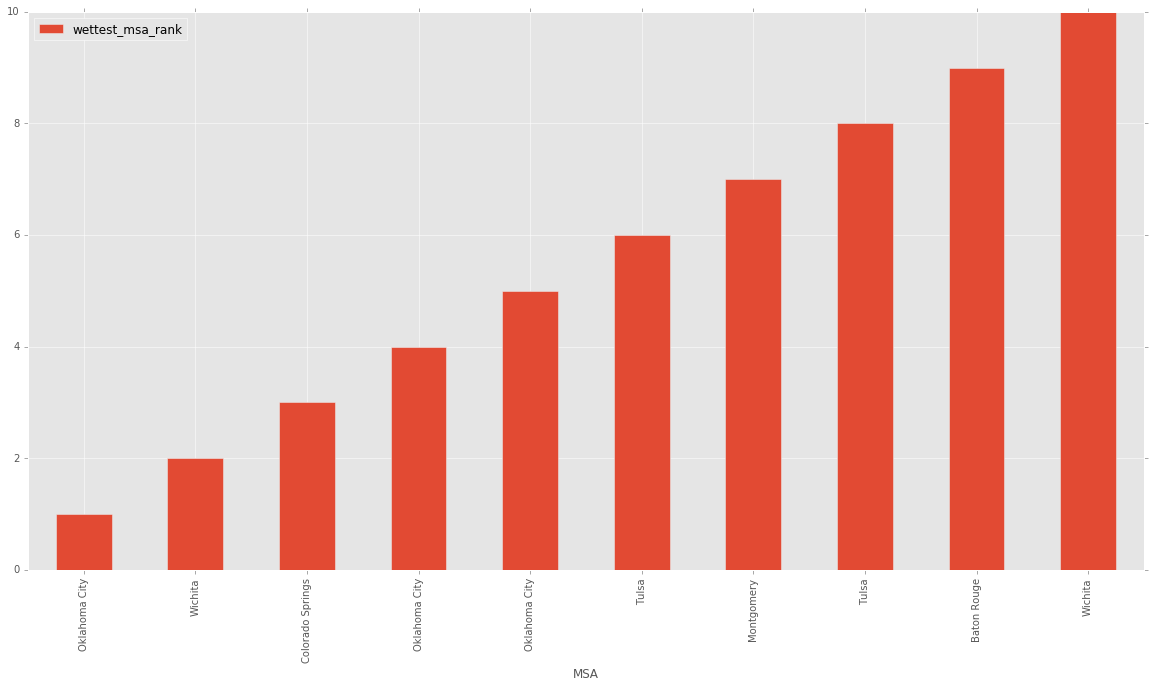

In [31]:
final_output.query("wettest_msa_rank < 11").plot.bar(x="msa", figsize=(20,10)).set_xlabel('MSA')